In [133]:
#Step1 :Import all necessary librabries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import sklearn.linear_model
import sklearn.ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#### Preprocessing

In [98]:
#Load trainSet and use header to known about trainset
data=pd.read_csv('Data.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [99]:
#describe dataset
data.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [100]:
#Lets
data.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [101]:
data.Item_Type.value_counts()


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [102]:
data.Outlet_Size.value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [103]:
data.Outlet_Type.value_counts()


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [104]:
data.Outlet_Location_Type.value_counts()


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [105]:
data_Missing=data.isnull().sum()


In [106]:
data_Missing

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [107]:
twowaytable=pd.crosstab(data['Outlet_Size'],data['Outlet_Type'])
twowaytable

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


In [108]:
#From above plot and table we can assume that Glacceray shops are of small size
#SO map Glocessary Shop and Size


In [109]:
d={'Grocery Store':'Small'}
s=data.Outlet_Type.map(d)
data.Outlet_Size=data.Outlet_Size.combine_first(s)


In [110]:
twowaytable=pd.crosstab(data['Outlet_Size'],data['Outlet_Location_Type'])
twowaytable


Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,555


In [111]:
#From plot and table we conclude that Tier 2 is of size small .
#So map Tier 2 and Size


In [112]:
d={'Tier 2':'Small'}
s=data.Outlet_Location_Type.map(d)
data.Outlet_Size=data.Outlet_Size.combine_first(s)


In [113]:
data.Outlet_Size.isnull().any()



False

In [114]:
#Fill missing values of weight of Item According to means of Item Identifier

In [115]:
data['Item_Weight']=data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('mean'))


In [116]:
data.Item_Weight.isnull().sum()


4

In [117]:
#fill Item_Weigth by theire corresponding Item_Type
List=['Baking Goods','Breads','Breakfast','Canned','Dairy','Frozen Foods','Fruits and Vegetables','Hard Drinks','Health and Hygiene','Household','Meat','Others','Seafood','Snack Foods','Soft Drinks','Starchy Foods']
Mean_values_Item_Type_data=data.groupby('Item_Type')['Item_Weight'].mean()
for i in List:
    d={i:Mean_values_Item_Type_data[i]}
    s=data.Item_Type.map(d)
    data.Item_Weight=data.Item_Weight.combine_first(s)
Mean_values_Item_Type_data=data.groupby('Item_Type')['Item_Weight'].mean()


In [118]:
data.Item_Weight.isnull().any()

False

In [119]:
data.Item_Visibility.value_counts()


0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [120]:
#From above observations therir are many zeros for item_Visiblity which not possible so 
#fill by corresponding means of Item_Identifiers
data['Item_Visibility'].replace(0.00000,np.nan)#first fill by nam for simplicity
data['Item_Visibility'].fillna(data.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))


0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

In [121]:
data['Item_Visibility'].fillna(data.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))


0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

In [122]:
data.Item_Visibility.isnull().any()

False

# Feature Engineering


In [123]:
#Fat_Content showing redudancy of differnt types
data.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [124]:
#Now replace LF by Low Fat ,low fat by lf,reg by Regular
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'})
data.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [125]:
#no of years outlet is working conditon 
data['Outlet_Years']=2018-data['Outlet_Establishment_Year']


In [126]:
Mean_Visibility=data['Item_Visibility'].mean()


In [127]:
data['Item_Visibility_MeanRatio']=data.apply(lambda x:x['Item_Visibility']/Mean_Visibility,axis=1)


In [128]:
#As Item Id and Outlet Id
data["Outlet_Size"].groupby(data["Outlet_Size"]).count()

Outlet_Size
High       932
Medium    2793
Small     4798
Name: Outlet_Size, dtype: int64

In [130]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Visibility_MeanRatio
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,19,0.242656
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9,0.291511
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,19,0.253434
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,20,0.000000
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31,0.000000


In [131]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Years                 0
Item_Visibility_MeanRatio    0
dtype: int64

In [136]:
#Convert categorical into numerical 
var_mod=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type','Outlet_Identifier','Item_Identifier']
number=LabelEncoder()


In [137]:
#Item_Identifier and outlet_Identifier are also useful for making prediction
data['Outlet']=number.fit_transform(data['Outlet_Identifier'])
data['Identifier']=number.fit_transform(data['Item_Identifier'])


In [138]:
for i in var_mod:
      data[i]=number.fit_transform(data[i])


In [139]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Visibility_MeanRatio,Outlet,Identifier
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,19,0.242656,9,156
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,9,0.291511,3,8
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,19,0.253434,9,662
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800,20,0.000000,0,1121
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,31,0.000000,1,1297


In [140]:
predictors=['Item_Weigth','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Years','Item_Visibility_MeanRatio'
            'Outlet','Identifier']

In [141]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Years',
       'Item_Visibility_MeanRatio', 'Outlet', 'Identifier'],
      dtype='object')

In [142]:
data=data.drop('Item_Identifier',axis=1)

In [143]:
data.shape

(8523, 15)

In [84]:
X=data.loc[:, data.columns != 'Item_Outlet_Sales']
y=data['Item_Outlet_Sales']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [146]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,Item_Visibility_MeanRatio,Outlet,Identifier
549,9.500,1,0.035206,6,171.3448,9,1999,1,0,1,19,0.532357,9,1102
7757,18.000,0,0.047473,9,170.5422,7,2002,2,1,1,16,0.717854,7,1322
764,17.600,1,0.076122,10,111.7202,8,1997,2,0,1,21,1.151058,8,1169
6867,8.325,0,0.029845,6,41.6138,7,2002,2,1,1,16,0.451298,7,789
2716,12.850,0,0.137228,13,155.5630,8,1997,2,0,1,21,2.075059,8,757


##### Model1

In [ ]:
model=LinearRegression(normalize=True)

In [147]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [148]:
y_predict=model.predict(X_test)

In [149]:
from sklearn.metrics import r2_score

In [150]:
r2_score(y_test,y_predict)

0.5190529791852581

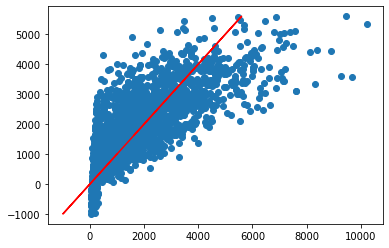

In [159]:
plt.scatter(y_test,y_predict)
plt.plot(y_predict,y_predict,c='r')

##### Model2

In [164]:
model1=RandomForestRegressor(n_estimators=100)

In [165]:
model1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [167]:
y_predict1=model1.predict(X_test)

In [168]:
r2_score(y_test,y_predict1)

0.5624490008437003

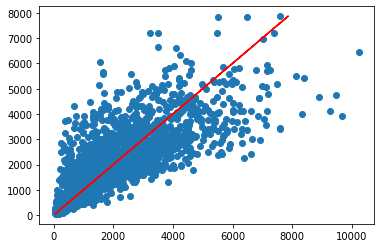

In [169]:
plt.scatter(y_test,y_predict1)
plt.plot(y_predict1,y_predict1,c='r')